In [1]:
import dtaidistance
from dtaidistance import preprocessing
from scipy import stats
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import array
import random
import pandas as pd
import math

## series 

In [6]:
## A noisy sine wave as query
time = np.arange(0, 20, 0.1);
amplitude = np.sin(time) 
time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie



,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


In [7]:
noise = np.random.normal(loc=0, scale=0.0001, size=time_serie.shape)

noisy_time_serie= time_serie + noise

noisy_time_serie_lagged=noisy_time_serie.shift(20)+ np.random.normal(loc=0, scale=0.01, size=time_serie.shape)


In [8]:
s1=noisy_time_serie['amplitude'].dropna().interpolate().values
s2=noisy_time_serie_lagged['amplitude'].dropna().interpolate().values

## DTW with noise

In [9]:
path = dtw.warping_path(s1,s2)
dtwvis.plot_warping(s1,s2, path, filename="warp_example_sin_noise.png")
## ver a imagem, esta guardada na pasta


(None, None)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

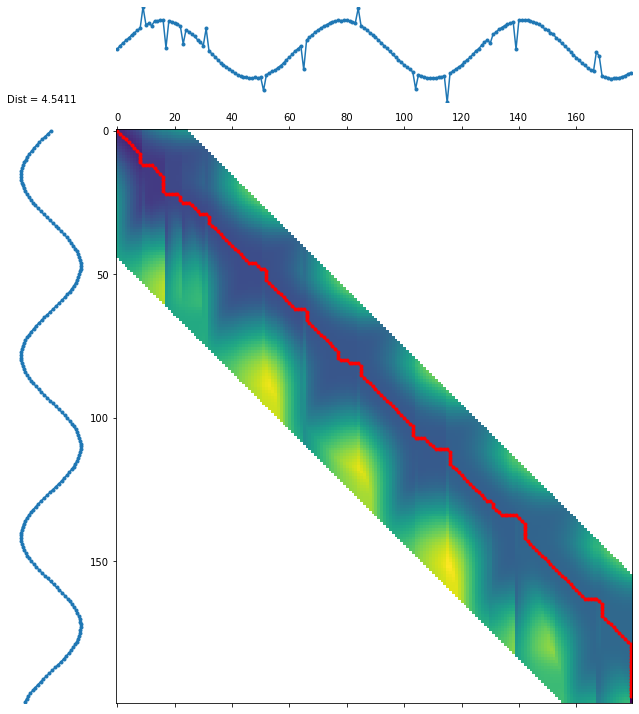

In [13]:
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

### DTW noiseless 

In [2]:
## A noisy sine wave as query
time = np.arange(0, 20, 0.1);
amplitude = np.sin(time) 
time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie


,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


In [3]:
time_serie_lagged= time_serie.shift(20) 
s1=time_serie['amplitude'].dropna().interpolate().values
s2=time_serie_lagged['amplitude'].dropna().interpolate().values


In [4]:
path = dtw.warping_path(s1,s2)
dtwvis.plot_warping(s1,s2, path, filename="warp_example_sin_noiseless.png")
## ver a imagem, esta guardada na pasta

(None, None)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

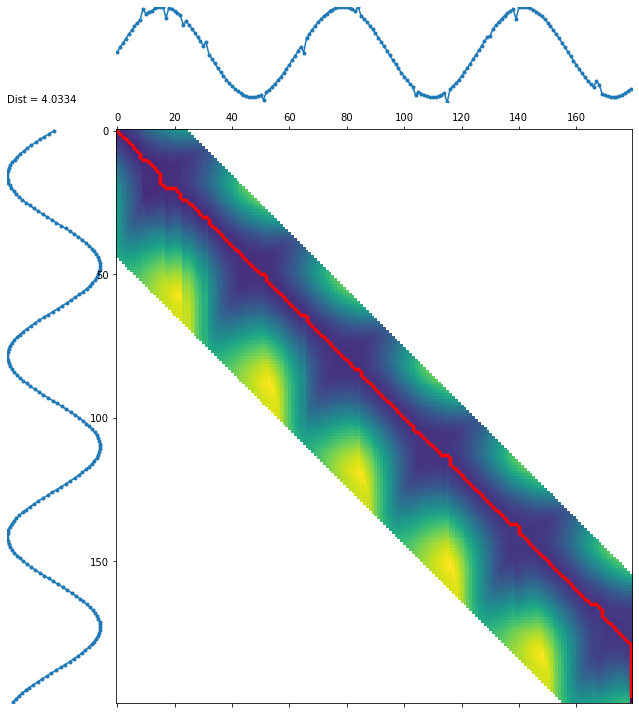

In [5]:
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

## DTW varius std

In [20]:
## A noisy sine wave as query
time = np.arange(0, 20, 0.1);
amplitude = np.sin(time) 
time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie

,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


In [26]:
variance=[0.001, 0.1, 0.3, 0.5, 1, 2]
data=pd.DataFrame() 
lagged=[]
lags_for_variances = []
noisy_time_serie= time_serie + np.random.normal(loc=0, scale=0.0001, size=time_serie.shape)
snr=[]

for k in variance:
    
    

    noisy_time_serie_lagged_var=noisy_time_serie.shift(20)+ np.random.normal(loc=0, scale=k, size=time_serie.shape)
    
    noise_std=noisy_time_serie_lagged_var['amplitude'].std()

    s1=noisy_time_serie['amplitude'].dropna().interpolate().values
    s2=noisy_time_serie_lagged_var['amplitude'].dropna().interpolate().values
    
    # Calculate the Signal-to-Noise Ratio (SNR)
    s=1/(noise_std*math.sqrt(2))
    snr.append(s)
    
    for i in range(1,10):
        random.seed(1)
        for idx in range(len(s2)):
            if random.random() < 0.05:
                s2[idx] += (random.random() - 0.5) / 2
        d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
        best_path = dtw.best_path(paths)
        lagged.append(best_path)
    
    data[k] = lagged
    lagged=[]
    lags_for_variances.append(d)
    


In [27]:
for i, lag in enumerate(lags_for_variances):
    print(f'Lag corresponding to Standard deviation {variance[i]}: {lag}')


Lag corresponding to Standard deviation 0.001: 6.5534343751018165
Lag corresponding to Standard deviation 0.1: 6.221849220481534
Lag corresponding to Standard deviation 0.3: 6.665092280614842
Lag corresponding to Standard deviation 0.5: 8.400782537966691
Lag corresponding to Standard deviation 1: 12.906475340397177
Lag corresponding to Standard deviation 2: 25.284922682465115


In [19]:
snr

[0.9859080939732253,
 0.9629574338428104,
 0.8346744420745247,
 0.6058316153682849,
 0.16847707373451296,
 0.14299390553586644]